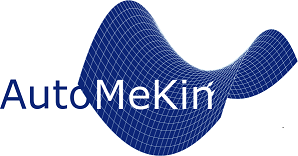
# Automated reaction Mechanisms and Kinetics



# Installing third-party packages

In [ ]:
%%capture
!apt update
!pip install --upgrade x3dase
!pip install ase networkx pdf2image 'bokeh==2.3.3' 'jsmol_bokeh_extension==0.2.1' pubchempy
!apt install bc gawk gcc gfortran parallel sqlite3 zenity gnuplot libmagickwand-dev poppler-utils
!pip uninstall -y jsmol_bokeh_extension
!git clone https://github.com/dgarayr/amk_tools.git
%cd /content/amk_tools
!pip install -e .

# Installing AutoMeKin

In [ ]:
%%capture
%cd /content/
!git clone https://github.com/emartineznunez/AutoMeKin.git
%cd /content/AutoMeKin
! autoreconf -i
!./configure --prefix=/opt/AutoMeKin
!make && make install
#We make use of the total number of processors
!sed -i 's@ignore=1@ignore=0@g' /opt/AutoMeKin/bin/utils.sh
%env PATH=".:/content/amk_tools/scripts:/opt/AutoMeKin/bin:/opt/AutoMeKin/bin/HLscripts:/opt/AutoMeKin/bin/MOPAC_DEV:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin"
%env LIBRARY_PATH="/opt/AutoMeKin/lib:/opt/AutoMeKin/bin/MOPAC_DEV:/usr/local/cuda/lib64/stubs"
%env AMK=/opt/AutoMeKin
%cd /content

# Running tests
Running several tests. Further details: https://emartineznunez.github.io/AutoMeKin/docs/tutorial.html

## **Association complexes**

In [ ]:
# @title Benzene (Bz)$-$N$_2$ complexes (Wall time: $\approx$ 1 min)
%%capture
!run_test.sh --tests=assoc

In [ ]:
# @title Visualization of the optimized Bz$-$N$_2$ structure
%cd /content/assoc
import IPython
from x3dase.visualize import view_x3d_n
from ase.io import read
atoms = read('Bz-N2.xyz')
view_x3d_n(atoms,output='molA.html', bond=1.0, label=True)
IPython.display.HTML(filename='molA.html')

## **Diels-Alder reaction**

In [ ]:
# @title Creating a local server
import IPython
from IPython.core.magic import register_line_magic
import subprocess

@register_line_magic
def run_local_server(line):
    handle = IPython.display.display(
            IPython.display.Pretty("Launching my server..."),
            display_id=True,
    )
    subprocess.Popen(['python', '-m', 'http.server'])
    shell = """
        (async () => {
            const url = new URL(await google.colab.kernel.proxyPort(8000, {'cache': true}));
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '800');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    script = IPython.display.Javascript(shell)
    handle.update(script)

In [ ]:
# @title Diels-Alder rxn
%%capture
%cd /content
!run_test.sh --tests=rdiels_bias

In [ ]:
# @title Generate network.html for visualization
%%capture
%cd /content/rdiels_bias/
%env iter=1
%env inter=0
!irc.sh
!min.sh
!rxn_network.sh
!kmc.sh
!final.sh
!amk_gen_view.py FINAL_LL_rdiels RXNet --paths
!mkdir HTML
!mv network.html HTML
%cd /content/rdiels_bias/HTML

In [ ]:
# @title _Open the file network.html_
!fuser -k 8000/tcp
%run_local_server

## **FA $\rightarrow$ H$_2$+CO$_2$ chemical reaction**

In [ ]:
# @title FA $\rightarrow$H$_2$+CO$_2$ rxn
%%capture
%cd /content
!run_test.sh --tests=FA_biasH2

In [ ]:
# @title Generate network.html for visualization
%%capture
%cd /content/FA_biasH2/
%env iter=1
%env inter=0
!irc.sh
!min.sh
!rxn_network.sh
!kmc.sh
!final.sh
!amk_gen_view.py FINAL_LL_FA RXNet --paths
!mkdir HTML
!mv network.html HTML
%cd /content/FA_biasH2/HTML

In [ ]:
# @title _Open the file network.html_
!fuser -k 8000/tcp
%run_local_server

## **FA $\rightarrow$ H$_2$O+CO chemical reaction**

In [ ]:
# @title FA $\rightarrow$H$_2$O+CO rxn
%%capture
%cd /content
!run_test.sh --tests=FA_biasH2O

In [ ]:
# @title Generate network.html for visualization
%%capture
%cd /content/FA_biasH2O/
%env iter=1
%env inter=0
!irc.sh
!min.sh
!rxn_network.sh
!kmc.sh
!final.sh
!amk_gen_view.py FINAL_LL_FA RXNet --paths
!mkdir HTML
!mv network.html HTML
%cd /content/FA_biasH2O/HTML

In [ ]:
# @title _Open the file network.html_
!fuser -k 8000/tcp
%run_local_server

## **Sampling conformational space**

In [ ]:
# @title Scanning torsions
%%capture
%cd /content
!run_test.sh --tests=ttors

In [ ]:
# @title Generate network.html for visualization
%%capture
%cd /content/ttors/
%env iter=1
%env inter=0
!cp ttors.xyz ttors_ref.xyz
!irc.sh
!min.sh
!rxn_network.sh
!kmc.sh
!final.sh
!amk_gen_view.py FINAL_LL_ttors RXNet --paths
!mkdir HTML
!mv network.html HTML
%cd /content/ttors/HTML

In [ ]:
# @title _Open the file network.html_
!fuser -k 8000/tcp
%run_local_server

## **Decomposition of formic acid at T= 300 and 5000 K**

In [ ]:
# @title FA decomposition channels & Kinetics at two different temperatures
%%capture
%cd /content
!run_test.sh --tests=FAthermo

In [ ]:
# @title _Kinetics@300K_
%cd /content/FAthermo
!awk '{print $0};NF==0{exit}' FINAL_LL_FA_T300/kineticsT300
from pdf2image import convert_from_path
from PIL import ImageOps

images = convert_from_path("FINAL_LL_FA_T300/populationT300.pdf",size=1500)
border=(100,450,0,400)
ImageOps.crop(images[0], border)

In [ ]:
# @title _Kinetics@5000K_
%cd /content/FAthermo
!awk '{print $0};NF==0{exit}' FINAL_LL_FA_T5000/kineticsT5000
from pdf2image import convert_from_path
from PIL import ImageOps

images = convert_from_path("FINAL_LL_FA_T5000/populationT5000.pdf",size=1500)
border=(100,450,0,400)
ImageOps.crop(images[0], border)

## **Chemical Knowledge sampling**

In [ ]:
# @title ChemKnow (be patient, this test takes $\approx$ 5-7 minutes)
%cd /content
!run_test.sh --tests=FA_ck

In [ ]:
# @title Generate network.html for visualization
%%capture
%cd /content/FA_ck/
%env iter=1
%env inter=0
!irc.sh
!min.sh
!rxn_network.sh
!kmc.sh
!final.sh
!amk_gen_view.py FINAL_LL_FA RXNet --paths
!mkdir HTML
!mv network.html HTML
%cd /content/FA_ck/HTML

In [ ]:
# @title _Open the file network.html_
!fuser -k 8000/tcp
%run_local_server